## load and Preprocessing data

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt


# load mnist from keras lib
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = np.array(x_train).reshape(len(x_train),28,28,1)/255
x_test = np.array(x_test).reshape(len(x_test),28,28,1)/255

y_train = to_categorical(np.array(y_train))
y_test = to_categorical(np.array(y_test))


Using TensorFlow backend.


## create model

In [2]:
from keras import models
from keras import layers
from keras import optimizers

# create sequntial model
model = models.Sequential()

# add conv2D net to model with filter=32  and kernel_size=3*3 and input shape =28*28 and padding ="same"
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(x_train.shape[1:]),padding='same'))
model.add(layers.Conv2D(32,(3,3), activation='relu',padding='same'))
# add MaxPooling2D layer with pool size = 2*2
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# add Dropout layer of 0.25
model.add(layers.Dropout(0.25))
# add flatten layer for convert tensor from (None, 15297, 13, 32) to (None, 6363552)
model.add(layers.Flatten())
# add fully-connected layer with 50 unit, activation relu and dropout of 0.5
model.add(layers.Dense(50, activation='relu',name='Dence'))
model.add(layers.Dropout(0.5))
# add fully-connected layer for output and activation softmax
model.add(layers.Dense(10, activation='softmax',name='output'))


# for train model we have to compile model 
# loss function = mean_squared_error
# optimazer = RMSpromp with learning rate 0.001
# metric = 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-3),
              metrics=['accuracy'])

# show summary of model
print(model.summary())






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
Dence (Dense)                (None, 50)                313650   

## train model

In [6]:
epochs=20
batch_size=128

# train model with epochs and batch_size 
# train data set = mnist digit 5,6,7,8,9
# validation_split = 20%
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 71us/step - loss: 0.1010 - acc: 0.9689 - val_loss: 0.0460 - val_acc: 0.9863
Epoch 2/50
48000/48000 [==============================] - 3s 70us/step - loss: 0.0922 - acc: 0.9704 - val_loss: 0.0449 - val_acc: 0.9869
Epoch 3/50
48000/48000 [==============================] - 3s 70us/step - loss: 0.0849 - acc: 0.9733 - val_loss: 0.0420 - val_acc: 0.9877
Epoch 4/50
48000/48000 [==============================] - 3s 69us/step - loss: 0.0774 - acc: 0.9745 - val_loss: 0.0424 - val_acc: 0.9878
Epoch 5/50
48000/48000 [==============================] - 3s 68us/step - loss: 0.0741 - acc: 0.9761 - val_loss: 0.0420 - val_acc: 0.9881
Epoch 6/50
48000/48000 [==============================] - 3s 69us/step - loss: 0.0749 - acc: 0.9752 - val_loss: 0.0412 - val_acc: 0.9887
Epoch 7/50
48000/48000 [==============================] - 3s 71us/step - loss: 0.0685 - acc: 0.9775 - val_loss: 0.0455 - val_acc

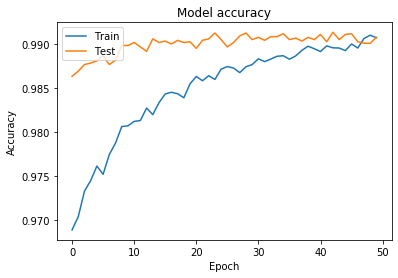

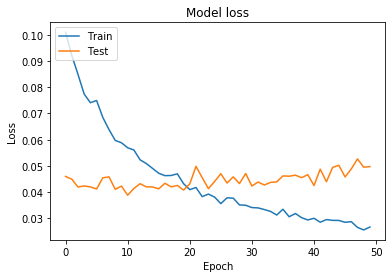

In [7]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## evaluate 

In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0404965528846292
Test accuracy: 0.9914


## evaluate
calculate

  * mse
  * confusion_matrix
  * f1_score
  * recall_score
  * precision_score




In [9]:
y_pred = model.predict_classes(x_test)

y_test_target = np.argmax(y_test,axis=1) # revers one-hot to int

mse = metrics.mean_squared_error(y_test_target,y_pred )
conf = metrics.confusion_matrix(y_test_target,y_pred)
f1_score = metrics.f1_score(y_test_target,y_pred,average=None)
recall = metrics.recall_score(y_test_target,y_pred,average=None)
precision = metrics.precision_score(y_test_target,y_pred,average=None)
print("mse = ",mse)
print("confusion_matrix: \n",conf)
print("f1 score = ",f1_score)
print("recall = ",recall)
print("precision = ",precision)

mse =  0.1589
confusion_matrix: 
 [[ 977    0    0    0    0    0    1    0    1    1]
 [   0 1131    3    0    0    1    0    0    0    0]
 [   1    3 1024    0    0    0    0    4    0    0]
 [   0    0    3 1005    0    1    0    0    1    0]
 [   0    0    0    0  976    0    0    0    2    4]
 [   1    0    1    6    0  883    1    0    0    0]
 [   3    3    0    0    1    4  945    0    2    0]
 [   0    2    8    1    0    0    0 1016    1    0]
 [   3    0    1    1    0    0    0    3  965    1]
 [   1    0    0    2    4    3    0    2    5  992]]
f1 score =  [0.99389624 0.99472296 0.98841699 0.99259259 0.99439633 0.98991031
 0.99212598 0.98977107 0.98923629 0.98854011]
recall =  [0.99693878 0.99647577 0.99224806 0.9950495  0.99389002 0.98991031
 0.98643006 0.98832685 0.99075975 0.98315164]
precision =  [0.99087221 0.99297629 0.98461538 0.99014778 0.99490316 0.98991031
 0.99788807 0.99121951 0.9877175  0.99398798]
